# Despeckling amplitudes using SHP-adaptive window multilooking

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from dolphin import io, despeckle, utils, HalfWindow, Strides
%matplotlib inline

In [2]:
v = io.VRTStack.from_vrt_file("slc_stack.vrt")

## Load data over Miami

In [11]:
%%time
s1 = v[1, :, :]

CPU times: user 1.43 s, sys: 228 ms, total: 1.66 s
Wall time: 1.66 s


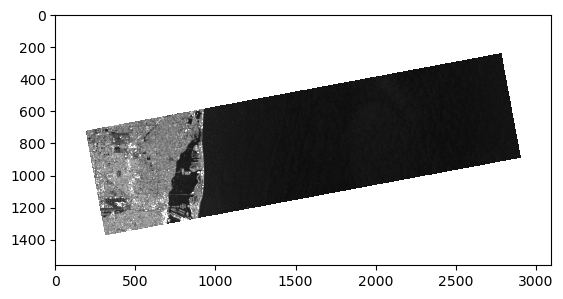

In [4]:
fig, ax = plt.subplots()
ax.imshow(np.abs(s1[::3, ::6]), vmax=200, cmap='gray')

## Run despeckling on one block

In [5]:
amps = np.abs(v[:, 2500:3000, 3_000:4_000])

In [6]:
# Run once to JIT compile
amps2, shp_counts = despeckle.despeckle(amps, half_window=HalfWindow(4, 9), strides=Strides(1, 1), shp_alpha=0.05)

In [7]:
%%time
amps2, shp_counts = despeckle.despeckle(amps, half_window=HalfWindow(4, 9), strides=Strides(1, 1), shp_alpha=0.05)

CPU times: user 2.24 s, sys: 475 ms, total: 2.71 s
Wall time: 510 ms


In [8]:
amps.shape, amps2.shape, shp_counts.shape

((5, 500, 1000), (5, 500, 1000), (500, 1000))

## Compare before and after

Text(0.5, 1.0, 'Despeckled')

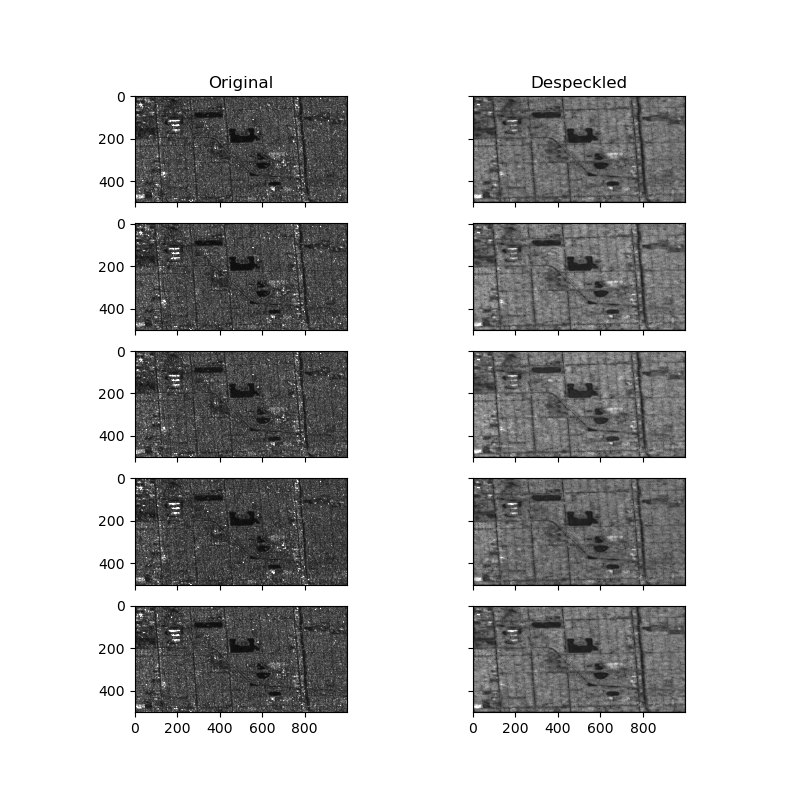

In [9]:
%matplotlib widget
fig, axes = plt.subplots(ncols=2, nrows=len(amps), sharex=True, sharey=True, figsize=(8, 8))
for a, b, ax_row in zip(amps, amps2, axes):
    ax_row[0].imshow(a, cmap='gray', vmax=np.percentile(a, 99))
    ax_row[1].imshow(b, cmap='gray', vmax=np.percentile(b, 99.9))

axes[0, 0].set_title("Original")
axes[0, 1].set_title("Despeckled")

Text(0.5, 1.0, 'SHP Counts')

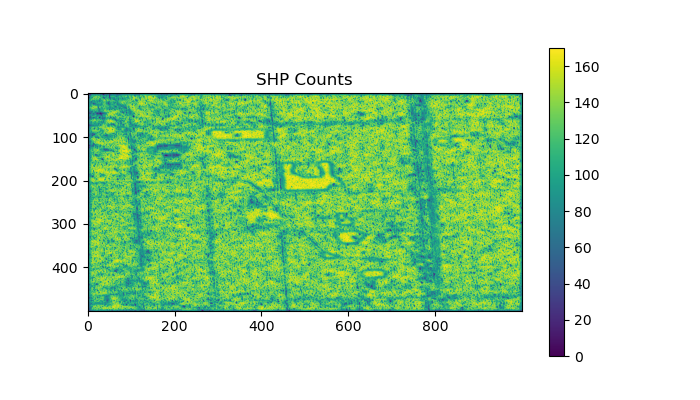

In [10]:
fig, ax = plt.subplots(figsize=(7, 4))
axim = ax.imshow(shp_counts)
fig.colorbar(axim)
ax.set_title("SHP Counts")